# Importing

In [25]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('pokemon.csv')

## Choosing pokemon

### human pokemon


In [26]:
human_type = input("Enter the type: (case sensitive)")
def choose_pokemon(type):
    type_column = 'Type 1'  
    name_column = 'Name'  




    filtered_df = df[df[type_column] == type]

    if not filtered_df.empty:
        
        global pokemon
        pokemon = filtered_df[name_column].sample().iloc[0]
        
        print(f"A random pokemon of '{type}' type is: {pokemon}")
        return pokemon
    else:
        print(f"No pokemon found for the type: {type}")
        return None

human_pokemon = choose_pokemon(human_type)


A random pokemon of 'Grass' type is: ShayminLand Forme


### ai pokemon

In [27]:
list_types = ['Ground','Poison','Ice','Fire','Fighting','Flying','Electric','Grass','Rock','Dark','Bug','Dragon','Fairy','Ghost','Psychic','Normal','Steel','Water']
ai_type = rd.choice(list_types)
ai_pokemon = (choose_pokemon(ai_type))

A random pokemon of 'Fighting' type is: Hitmonchan


### battling pokemon


In [28]:
type_counters = {
    "Fire": ["Grass", "Bug", "Ice", "Steel"],
    "Water": ["Fire", "Ground", "Rock"],
    "Grass": ["Water", "Ground", "Rock"],
    "Electric": ["Water", "Flying"],
    "Ground": ["Fire", "Electric", "Poison", "Rock", "Steel"],
    "Rock": ["Fire", "Ice", "Flying", "Bug"],
    "Ice": ["Grass", "Ground", "Flying", "Dragon"],
    "Flying": ["Grass", "Fighting", "Bug"],
    "Bug": ["Grass", "Psychic", "Dark"],
    "Steel": ["Ice", "Rock", "Fairy"],
    "Fighting": ["Normal", "Ice", "Rock", "Dark", "Steel"],
    "Poison": ["Grass", "Fairy"],
    "Psychic": ["Fighting", "Poison"],
    "Dark": ["Psychic", "Ghost"],
    "Fairy": ["Fighting", "Dragon", "Dark"],
    "Dragon": ["Dragon"],
    "Ghost": ["Psychic", "Ghost"],
    "Normal": []
}
def counters(type):
    return type_counters.get(type,[])
human_counters =(counters(human_type))
ai_counters = (counters(ai_type))
if ai_type in human_counters:
    print(f"{human_type} counters {ai_type} so you win! ")
elif human_type in ai_counters:
    print(f"{ai_type} counters {human_type} so you lose :(")
else:
    print(f"Neither type counters the other.\nWe will go into the final battle")

neither type counters the other.
We will go into the final battle


## getting power

In [29]:

def power(pokemon):
    try:
        total = df.loc[df['Name'] == pokemon, 'Total'].values[0]
        print(f"The total for {pokemon} is: {total}")
        return total
    except IndexError:
        print(f"{pokemon} not found in the list.")
human_power =(power(human_pokemon))
ai_power = (power(ai_pokemon))


The total for ShayminLand Forme is: 600
The total for Hitmonchan is: 455


In [30]:
aipmon_atk = df.loc[df['Name'] == ai_pokemon, 'Attack'].values[0]
aipmon_hp = df.loc[df['Name'] == ai_pokemon, 'HP'].values[0]
aipmon_def = df.loc[df['Name'] == ai_pokemon, 'Defense'].values[0]
aipmon_spd = df.loc[df['Name'] == ai_pokemon, 'Speed'].values[0]

humanpmon_atk = df.loc[df['Name'] == human_pokemon, 'Attack'].values[0]
humanpmon_hp = df.loc[df['Name'] == human_pokemon, 'HP'].values[0]
humanpmon_def = df.loc[df['Name'] == human_pokemon, 'Defense'].values[0]
humanpmon_spd = df.loc[df['Name'] == human_pokemon, 'Speed'].values[0]

# FINAL BATTLE

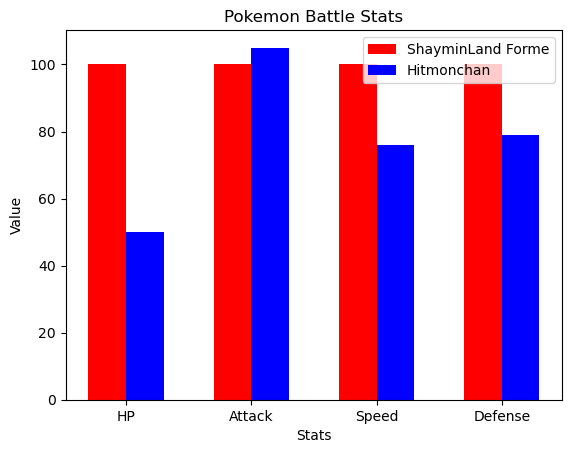

In [31]:
human_stats = [humanpmon_hp,humanpmon_atk,humanpmon_spd,humanpmon_def]
ai_stats = [aipmon_hp,aipmon_atk,aipmon_spd,aipmon_def]
labels = ["HP","Attack","Speed","Defense"]
fig, ax = plt.subplots()
width = 0.3
x = range(len(labels))
ax.bar([p - width/2 for p in x], human_stats, width, color='red', label=human_pokemon)
ax.bar([p + width/2 for p in x], ai_stats, width, color='blue', label=ai_pokemon)
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title('Pokemon Battle Stats')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend()
plt.show()

In [32]:
if ai_type not in human_counters and human_type not in ai_counters:
        print("Welcome to the final battle!\nNone of ur pokemon counter eachother so we will take their individual stats as power (atk,def,hp,speed,etc)")
        print(f"The power of the Ai's {ai_pokemon} is {ai_power}\nThe power of your {human_pokemon} is {human_power}\nThat means......")
        if human_power > ai_power:
            print('YOU WON THE BATTLE! GGS.')
        else:
            print("Your lost the battle. Better luck next time!")

Welcome to the final battle!
None of ur pokemon counter eachother so we will take their individual stats as power (atk,def,hp,speed,etc)
The power of the Ai's Hitmonchan is 455
The power of your ShayminLand Forme is 600
That means......
YOU WON THE BATTLE! GGS.
